# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [5]:
display(data.head())
display(data.info())
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [22]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['MEDV']

print(X.columns)
print(y.name)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print("\n********************************")
print("Train info: \n")
print(X_train.info())
print(y_train.describe())
print("\n**********************************")
print("Test info: \n")
print(X_test.info())
print(y_test.describe())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
MEDV

********************************
Train info: 

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 478 to 193
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB
None
count    404.000000
mean      22.465099
std        9.118565
min        5.000000
25% 

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)

print(f'Intercept: {lm.intercept_}')
print(f'Coefficients: ')
for variable, coeff in zip(X_train.columns, lm.coef_):
    print(f'\t{variable : >7}: {coeff:>22}')


Intercept: 42.36763479477938
Coefficients: 
	   CRIM:     -0.127847323884535
	     ZN:    0.05584183581666361
	  INDUS:   -0.01781895620197401
	   CHAS:      2.619695807762996
	    NOX:    -19.677331596631326
	     RM:     3.0223775642407302
	    AGE:    0.00901554876394927
	    DIS:    -1.6704691206279505
	    RAD:    0.32458692894653285
	    TAX:  -0.011706094143365715
	PTRATIO:     -0.906243784781309
	      B:   0.009594044343218418
	  LSTAT:     -0.585616384561702


In [37]:
y_train_pred = lm.predict(X_train)
y_test_pred  = lm.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [40]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred) 
r2_test  = r2_score(y_test, y_test_pred)

print(f"The R2 score for the training set is {r2_train}.")
print(f"The R2 score for the testing set is {r2_test}")

The R2 score for the training set is 0.7318885241650972.
The R2 score for the testing set is 0.7587636469040557


## 4. Calculate and print mean squared error for both the training and the testing set.

In [41]:
# Your code here :
from sklearn.metrics import mean_squared_error as mse

mse_train = mse(y_train, y_train_pred)
mse_test  = mse(y_test, y_test_pred)

print (f"The mean squared error for the training set is {mse_train}.")
print (f"The mean squared error for the testing set is {mse_test}.")

The mean squared error for the training set is 22.237814778891366.
The mean squared error for the testing set is 21.75471774094626.


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [42]:
# Your code here :
from sklearn.metrics import mean_absolute_error as mae

mae_train = mae(y_train, y_train_pred)
mae_test  = mae(y_test, y_test_pred)

print (f"The mean absolute error for the training set is {mae_train}.")
print (f"The mean absolute error for the testing set is {mae_test}.")

The mean absolute error for the training set is 3.299453459416793.
The mean absolute error for the testing set is 3.447648571893277.


## Classification Model Evaluation

In [44]:
from sklearn.datasets import load_iris
data = load_iris()

In [49]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [50]:
column_names = data.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
df = pd.DataFrame(data['data'],columns=column_names)

In [52]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
target = pd.DataFrame(data.target)
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [54]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [55]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [61]:

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

print(f"X_train shape: {X_train.shape}, \nX_test shape: {X_test.shape}")
print(f"\ny_train shape: {y_train.shape}, \ny_test shape: {y_test.shape}")


X_train shape: (120, 4), 
X_test shape: (30, 4)

y_train shape: (120, 1), 
y_test shape: (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [67]:
# Your code here :
from sklearn.linear_model import LogisticRegression

iris_model = LogisticRegression().fit(X_train, y_train)

yiris_train_pred = iris_model.predict(X_train)
yiris_test_pred = iris_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [68]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, yiris_train_pred)
accuracy_test  = accuracy_score(y_test, yiris_test_pred)

print(f"The training set accuracy score is {accuracy_train}.")
print(f"The testing accuracy score is {accuracy_test}")

The training set accuracy score is 0.9833333333333333.
The testing accuracy score is 0.9333333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [69]:
from sklearn.metrics import balanced_accuracy_score

balanced_training = balanced_accuracy_score(y_train, yiris_train_pred)
balanced_test  = balanced_accuracy_score(y_test, yiris_test_pred)

print(f"The training set balanced accuracy score is {balanced_training}.")
print(f"The testing balanced accuracy score is {balanced_test}.")

The training set balanced accuracy score is 0.9803921568627452.
The testing balanced accuracy score is 0.9421296296296297.


## 10. Calculate and print the precision score for both the training and the testing set.

In [71]:
from sklearn.metrics import precision_score

precision_training = precision_score(y_train, yiris_train_pred, average='macro')
precision_test  = precision_score(y_test, yiris_test_pred, average='macro')

print(f"The training set precision score is {precision_training}.")
print(f"The testing precision score is {precision_test}.")


The training set precision score is 0.9844961240310077.
The testing precision score is 0.9421296296296297.


## 11. Calculate and print the recall score for both the training and the testing set.

In [73]:
from sklearn.metrics import recall_score

recall_training = recall_score(y_train, yiris_train_pred, average='macro')
recall_test  = recall_score(y_test, yiris_test_pred, average='macro')

print(f"The training set recall score is {recall_training}.")
print(f"The testing recall score is {recall_test}.")

The training set recall score is 0.9803921568627452.
The testing recall score is 0.9421296296296297.


## 12. Calculate and print the F1 score for both the training and the testing set.

In [74]:
from sklearn.metrics import f1_score

f1_training = f1_score(y_train, yiris_train_pred, average='macro')
f1_test  = f1_score(y_test, yiris_test_pred, average='macro')

print(f"The training set F1 score is {f1_training}.")
print(f"The testing F1 score is {f1_test}.")

The training set F1 score is 0.981962481962482.
The testing F1 score is 0.9421296296296297.


## 13. Generate confusion matrices for both the training and the testing set.

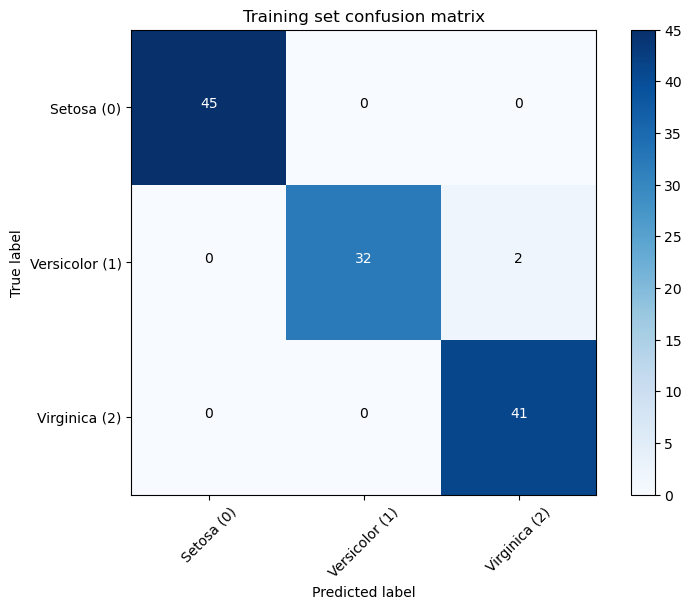

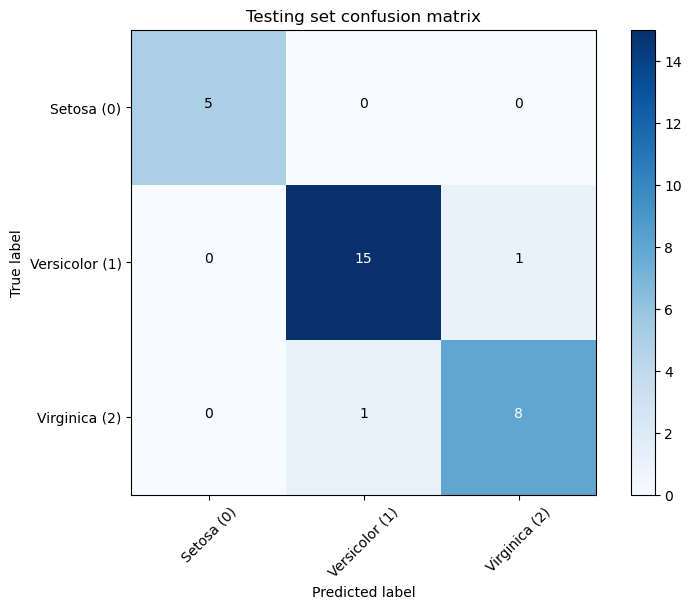

In [76]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

def plot_confusion_matrix(y, y_pred, title):
    # Generate the confusion matrix
    cm = metrics.confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    
    # Adding tick marks and labels for clarity
    classes = ["Setosa (0)", "Versicolor (1)", "Virginica (2)"]       #np.unique(y)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Adding text annotations to each cell in the confusion matrix
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(y_train, yiris_train_pred, "Training set confusion matrix")
plot_confusion_matrix(y_test,  yiris_test_pred, "Testing set confusion matrix")


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !